# Exploratory Analysis
## Stats 131 Project 

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
movies = pd.read_csv("movie_metadata.csv")

In [49]:
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
movies.shape

(5043, 28)

In [6]:
#keeping only title, genre, and budget columns 
genres_budget = movies[['title_year', 'movie_title', 'genres', 'budget']]
genres_budget = genres_budget.dropna(axis = 0) #remove missing values
genres_budget.head()

,title_year,movie_title,genres,budget
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0
2,2015.0,Spectre,Action|Adventure|Thriller,245000000.0
3,2012.0,The Dark Knight Rises,Action|Thriller,250000000.0
5,2012.0,John Carter,Action|Adventure|Sci-Fi,263700000.0


In [7]:
genres_budget.shape

(4543, 4)

In [8]:
#only looking from after 1986
genres_budget = genres_budget.loc[genres_budget['title_year'] > 1986.0]
genres_budget.head()

,title_year,movie_title,genres,budget
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0
2,2015.0,Spectre,Action|Adventure|Thriller,245000000.0
3,2012.0,The Dark Knight Rises,Action|Thriller,250000000.0
5,2012.0,John Carter,Action|Adventure|Sci-Fi,263700000.0


In [9]:
genres_budget.shape

(4110, 4)

In [10]:
genres_budget.title_year.unique()

array([2009., 2007., 2015., 2012., 2010., 2016., 2006., 2008., 2013.,
       2011., 2014., 2005., 1997., 2004., 1999., 1995., 2003., 2001.,
       2002., 1998., 2000., 1990., 1991., 1994., 1996., 1993., 1992.,
       1989., 1988., 1987.])

In [11]:
#splitting genres string into a list
genres_budget['genres_breakdown'] = [item.split("|") for item in genres_budget.genres]
genres_budget.head()

,title_year,movie_title,genres,budget,genres_breakdown
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,"[Action, Adventure, Fantasy, Sci-Fi]"
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0,"[Action, Adventure, Fantasy]"
2,2015.0,Spectre,Action|Adventure|Thriller,245000000.0,"[Action, Adventure, Thriller]"
3,2012.0,The Dark Knight Rises,Action|Thriller,250000000.0,"[Action, Thriller]"
5,2012.0,John Carter,Action|Adventure|Sci-Fi,263700000.0,"[Action, Adventure, Sci-Fi]"


In [12]:
#number of genre categories each movie is in
genres_budget['genres_amt'] = [len(item) for item in genres_budget.genres_breakdown]
genres_budget.head()

,title_year,movie_title,genres,budget,genres_breakdown,genres_amt
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,"[Action, Adventure, Fantasy, Sci-Fi]",4
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0,"[Action, Adventure, Fantasy]",3
2,2015.0,Spectre,Action|Adventure|Thriller,245000000.0,"[Action, Adventure, Thriller]",3
3,2012.0,The Dark Knight Rises,Action|Thriller,250000000.0,"[Action, Thriller]",2
5,2012.0,John Carter,Action|Adventure|Sci-Fi,263700000.0,"[Action, Adventure, Sci-Fi]",3


#dividing movie budget among each of its genre categories
genres_budget['split_budget'] = genres_budget.budget / genres_budget.genres_amt
genres_budget.head()

In [13]:
s = genres_budget.apply(lambda x: pd.Series(x['genres_breakdown']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genres_breakdown'
yearly_breakdown = genres_budget.drop('genres_breakdown', axis = 1).join(s)
yearly_breakdown['genres_breakdown'] = pd.Series(yearly_breakdown['genres_breakdown'], dtype = object)
yearly_breakdown.head()


,title_year,movie_title,genres,budget,genres_amt,genres_breakdown
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,4,Action
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,4,Adventure
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,4,Fantasy
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,4,Sci-Fi
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0,3,Action


In [18]:
yearly_budgets = yearly_breakdown.groupby(['title_year','genres_breakdown'])['budget'].mean()
yearly_budgets = yearly_budgets.unstack('genres_breakdown')
yearly_budgets = yearly_budgets.fillna(0.0) 
yearly_budgets['avg'] = yearly_budgets.mean(axis = 1)
yearly_budgets.head()

genres_breakdown,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,avg
title_year,,,,,,,,,,,,,,,,,,,,,
1987.0,1.839500e+07,2.075000e+07,2300000.0,17875000.0,1.401818e+07,1.926000e+07,0.0,1.168077e+07,1.157500e+07,4.737500e+06,...,0.0,0.0,1.086667e+07,20425000.0,0.0,0.0,1.707692e+07,13000000.0,0.000000e+00,1.067978e+07
1988.0,1.401000e+08,2.357500e+07,556250000.0,1100000.0,1.653000e+07,1.360000e+07,0.0,1.296923e+07,1.525000e+07,1.267143e+07,...,4700000.0,0.0,1.440000e+07,281750000.0,0.0,1100000.0,1.592727e+07,63000000.0,1.300000e+07,5.209448e+07
1989.0,2.482727e+07,3.170000e+07,0.0,11500000.0,1.801667e+07,3.100000e+07,160000.0,1.654615e+07,7.500000e+06,1.862500e+07,...,19000000.0,0.0,1.200000e+07,26600000.0,0.0,10500000.0,2.683000e+07,14750000.0,0.000000e+00,1.307341e+07
1990.0,5.110000e+07,3.071429e+07,0.0,25000000.0,2.777158e+07,4.900000e+07,0.0,2.658056e+07,2.601133e+07,2.720000e+07,...,40000000.0,0.0,2.328238e+07,35000000.0,34000.0,60000000.0,4.650000e+07,0.0,2.733333e+07,2.480702e+07
1991.0,3.445455e+07,3.266667e+07,0.0,38000000.0,2.373254e+07,1.627222e+07,0.0,1.938076e+07,3.716667e+07,2.775000e+07,...,0.0,0.0,1.850000e+07,36600000.0,0.0,0.0,2.394444e+07,35000000.0,2.300000e+07,2.061273e+07


In [24]:
#verify that the first entry - avg is 
yearly_budgets.iloc[0,0] - yearly_budgets.iloc[0,-1]

7715215.6177156195

yearly_budgets = yearly_breakdown.groupby(['title_year', 'genres_breakdown'])['split_budget'].sum()
yearly_budgets = yearly_budgets.unstack('genres_breakdown')
yearly_budgets = yearly_budgets.fillna(0.0) 
#turning budgets into ratios by year 
yearly_budgets['total'] = yearly_budgets.sum(axis = 1)
yearly_budgets

# Budget Exploration: Each genre's comparison to the yearly mean budget

In [28]:
#turning budgets into ratios (by year) 
srs = pd.DataFrame(yearly_budgets['avg'])
budget_ratio = yearly_budgets.sub(srs['avg'], axis = 'index')
budget_ratio.drop(budget_ratio.columns[len(budget_ratio.columns)-1], axis=1, inplace=True)
budget_ratio

genres_breakdown,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
title_year,,,,,,,,,,,,,,,,,,,,,
1987.0,7.715216e+06,1.007022e+07,-8.379784e+06,7.195216e+06,3.338397e+06,8.580216e+06,-1.067978e+07,1.000985e+06,8.952156e+05,-5.942284e+06,...,-8.379784e+06,-1.067978e+07,-1.067978e+07,1.868823e+05,9.745216e+06,-1.067978e+07,-1.067978e+07,6.397139e+06,2.320216e+06,-1.067978e+07
1988.0,8.800552e+07,-2.851948e+07,5.041555e+08,-5.099448e+07,-3.556448e+07,-3.849448e+07,-5.209448e+07,-3.912524e+07,-3.684448e+07,-3.942305e+07,...,-4.559448e+07,-4.739448e+07,-5.209448e+07,-3.769448e+07,2.296555e+08,-5.209448e+07,-5.099448e+07,-3.616720e+07,1.090552e+07,-3.909448e+07
1989.0,1.175386e+07,1.862659e+07,-1.307341e+07,-1.573410e+06,4.943257e+06,1.792659e+07,-1.291341e+07,3.472744e+06,-5.573410e+06,5.551590e+06,...,-1.307341e+07,5.926590e+06,-1.307341e+07,-1.073410e+06,1.352659e+07,-1.307341e+07,-2.573410e+06,1.375659e+07,1.676590e+06,-1.307341e+07
1990.0,2.629298e+07,5.907265e+06,-2.480702e+07,1.929797e+05,2.964563e+06,2.419298e+07,-2.480702e+07,1.773535e+06,1.204313e+06,2.392980e+06,...,-2.477302e+07,1.519298e+07,-2.480702e+07,-1.524645e+06,1.019298e+07,-2.477302e+07,3.519298e+07,2.169298e+07,-2.480702e+07,2.526313e+06
1991.0,1.384181e+07,1.205393e+07,-2.061273e+07,1.738727e+07,3.119806e+06,-4.340510e+06,-2.061273e+07,-1.231968e+06,1.655393e+07,7.137267e+06,...,1.738727e+07,-2.061273e+07,-2.061273e+07,-2.112733e+06,1.598727e+07,-2.061273e+07,-2.061273e+07,3.331712e+06,1.438727e+07,2.387267e+06
1992.0,1.049830e+07,9.775302e+06,6.275302e+06,1.227530e+07,4.366211e+06,-9.996789e+06,-2.172470e+07,3.534688e+05,-4.724698e+06,7.875302e+06,...,-1.724698e+06,-9.224698e+06,-2.172470e+07,7.106002e+06,1.275302e+06,-2.172470e+07,3.275302e+06,-2.673998e+06,1.827530e+07,-7.324698e+06
1993.0,6.590615e+06,1.634656e+07,8.882922e+06,6.132922e+06,2.456256e+06,9.029224e+05,-1.911708e+07,-4.430035e+05,2.668637e+06,8.292922e+06,...,-1.911708e+07,2.454959e+07,-1.911708e+07,-4.909935e+06,1.379959e+07,-1.911708e+07,-1.031708e+07,7.775780e+06,5.882922e+06,5.882922e+06
1994.0,7.842357e+06,1.311078e+07,1.881078e+07,2.477444e+06,2.711480e+05,4.189725e+06,-2.548922e+07,4.229296e+06,7.667921e+06,2.366333e+06,...,1.881078e+07,-3.189222e+06,-2.618922e+07,-1.939222e+06,3.144111e+06,-2.618922e+07,-2.548922e+07,1.401078e+07,3.810778e+06,2.031078e+07
1995.0,1.820981e+07,3.503834e+07,1.223064e+07,1.293064e+07,-6.380814e+06,-1.725238e+06,-3.026936e+07,-2.615977e+06,1.173064e+07,1.730644e+06,...,2.473064e+07,-7.102689e+06,-3.026936e+07,-7.589668e+06,2.523064e+07,-3.026936e+07,-3.026936e+07,8.739904e+06,1.339731e+07,1.730644e+06


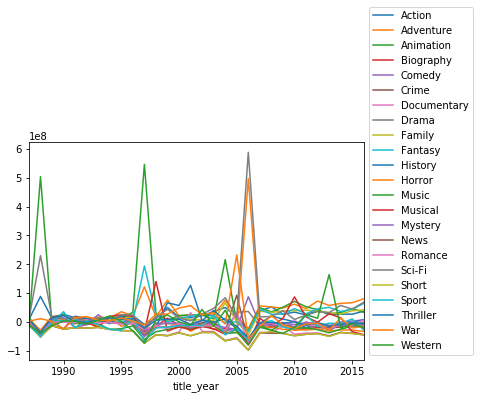

In [34]:
#results['BMXLEG'].plot(label = "leg length")
budget_ratio.plot()
plt.legend(bbox_to_anchor=(1,0), loc="lower left")

# JT attempt May 20

In [20]:
yearly_breakdown.head()

,title_year,movie_title,genres,budget,genres_amt,split_budget,genres_breakdown
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,4,59250000.0,Action
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,4,59250000.0,Adventure
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,4,59250000.0,Fantasy
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,4,59250000.0,Sci-Fi
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0,3,100000000.0,Action


In [25]:
#creates array of genres

import numpy as np
genres_col = movies.iloc[:,9]
#print(genres_col)
#dtype(genres_col)
np.dtype(genres_col) #Python objects
first_line = genres_col.iloc[0,]
first_line
str(first_line).split("|")
#print(np.shape(genres_col))

genres_breakdown1 = str(genres_col).split("|")
#print(genres_breakdown)

#unpacks genres
genre_breakdown = [str(genres_col.iloc[i,]).split("|") for i in range(0,5043)]
np.shape(genre_breakdown)
#outputs first 5 lines of genre breakdown. Each line corresponds to a movie.
genre_breakdown[0:5] 

#creates array of all genre types
genres = ['Action']

for x in range(0,len(genre_breakdown)):
    for i in range(0,len(genre_breakdown[x])):
        if genre_breakdown[x][i] not in genres:
            genres.append(genre_breakdown[x][i])
print(genres)
print(len(genres)) #26 genre types

['Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Thriller', 'Documentary', 'Romance', 'Animation', 'Comedy', 'Family', 'Musical', 'Mystery', 'Western', 'Drama', 'History', 'Sport', 'Crime', 'Horror', 'War', 'Biography', 'Music', 'Game-Show', 'Reality-TV', 'News', 'Short', 'Film-Noir']
26


Text(0.5,1,'Frequency of Movies Based on Genre and Year')

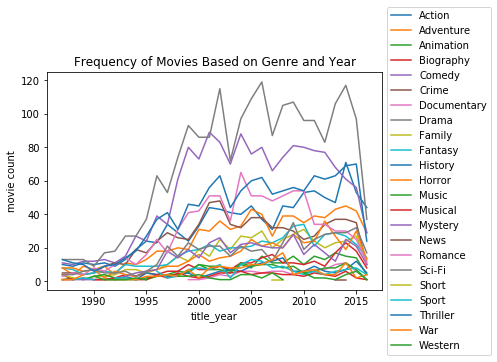

In [65]:
#plot of frequency of genre types each year

genre_count_by_yr = yearly_breakdown.groupby(['title_year','genres_breakdown']).count()['movie_title'].unstack()
import matplotlib.pyplot as plt
x = genre_count_by_yr.plot()
x.legend(loc='center left', bbox_to_anchor=(1, 0.5))
x.set_ylabel('movie count')
x.set_title('Frequency of Movies Based on Genre and Year')

In [69]:
genre_count_by_yr = yearly_breakdown.groupby(['title_year','genres_breakdown']).count()['movie_title'].unstack()
genre_count_by_yr.head()

genres_breakdown,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
title_year,,,,,,,,,,,,,,,,,,,,,
1987.0,10.0,8.0,1.0,4.0,11.0,5.0,NaN,13.0,4.0,8.0,...,1.0,NaN,NaN,3.0,4.0,NaN,NaN,13.0,1.0,NaN
1988.0,9.0,4.0,2.0,1.0,10.0,5.0,NaN,13.0,2.0,7.0,...,1.0,1.0,NaN,5.0,4.0,NaN,1.0,11.0,1.0,1.0
1989.0,11.0,9.0,NaN,2.0,12.0,4.0,1.0,13.0,1.0,4.0,...,NaN,1.0,NaN,4.0,6.0,NaN,2.0,10.0,4.0,NaN
1990.0,10.0,7.0,NaN,1.0,12.0,5.0,NaN,9.0,3.0,5.0,...,1.0,1.0,NaN,8.0,7.0,1.0,1.0,6.0,NaN,3.0
1991.0,11.0,9.0,NaN,1.0,13.0,9.0,NaN,17.0,3.0,6.0,...,1.0,NaN,NaN,6.0,5.0,NaN,NaN,9.0,1.0,1.0


Text(0.5,1,'Proportion of Movies of Each Genre Each Year')

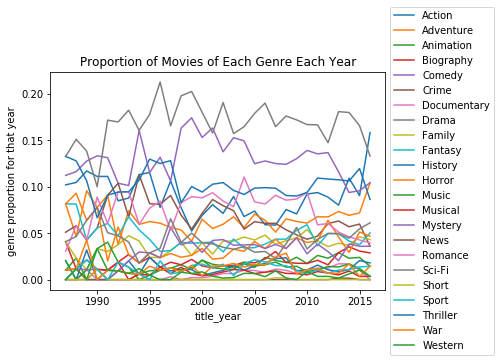

In [145]:
#creates and plots dataframe of proportion of each genre each year
genre_count_by_yr[np.isnan(genre_count_by_yr)]=0
row_sum = genre_count_by_yr.sum(axis=1)
genre_prop = genre_count_by_yr.div(row_sum, axis=0)
y = genre_prop.plot()
y.legend(loc='center left', bbox_to_anchor=(1, 0.5))
y.set_ylabel('genre proportion for that year')
y.set_title('Proportion of Movies of Each Genre Each Year')